In [41]:
import pandas as pd
from PIL import Image
import numpy as np
import scipy.misc as smp
import matplotlib.pyplot as plt
from pylab import *

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.utils import shuffle as shfl
from sklearn.model_selection import KFold

In [42]:
import numpy, imageio, glob, sys, os, random

def get_labels_and_files(folder):
    filelists = []
    for label in range(0,10):
        filelist = []
        filelists.append(filelist);
        dirname = os.path.join(folder, chr(ord('A') + label))
        for file in os.listdir(dirname):
            if (file.endswith('.png')):
                fullname = os.path.join(dirname, file)
            if (os.path.getsize(fullname) > 0):
                filelist.append(fullname)
            else:
                print('file ' + fullname + ' is empty')
        filelist.sort()

    labelsAndFiles = []
    for label in range(0,10):
        filelist = filelists[label]
        for filename in filelist:
            labelsAndFiles.append((label, filename))

    return labelsAndFiles

def make_arrays(labelsAndFiles):
    images = []
    labels = []
    for i in range(0, len(labelsAndFiles)):
        if (i % 100 == 0):
            sys.stdout.write("\r%d%% complete" % ((i * 100)/len(labelsAndFiles)))
            sys.stdout.flush()

        filename = labelsAndFiles[i][1]
        try:
            image = imageio.imread(filename)
            images.append(image)
            labels.append(labelsAndFiles[i][0])
        except:
            # If this happens we won't have the requested number
            print("\nCan't read image file " + filename)

    count = len(images)
    imagedata = numpy.zeros((count,28,28), dtype=numpy.uint8)
    labeldata = numpy.zeros(count, dtype=numpy.uint8)
    for i in range(0, count):
        imagedata[i] = images[i]
        labeldata[i] = labels[i]
    print("\n")
    return imagedata, labeldata

def write_labeldata(labeldata, outputfile):
    header = numpy.array([0x0801, len(labeldata)], dtype='>i4')
    with open(outputfile, "wb") as f:
        f.write(header.tobytes())
        f.write(labeldata.tobytes())

def write_imagedata(imagedata, outputfile):
    header = numpy.array([0x0803, len(imagedata), 28, 28], dtype='>i4')
    with open(outputfile, "wb") as f:
        f.write(header.tobytes())
        f.write(imagedata.tobytes())

def load_data(dirname):
    labelsAndFiles = get_labels_and_files(dirname)
    random.shuffle(labelsAndFiles)
    imagedata, labeldata = make_arrays(labelsAndFiles)
    return (imagedata, labeldata)

In [43]:
X, Y = load_data('/Users/asaskevich/Downloads/notMNIST_large/')

file /Users/asaskevich/Downloads/notMNIST_large/A/Um9tYW5hIEJvbGQucGZi.png is empty
file /Users/asaskevich/Downloads/notMNIST_large/A/SG90IE11c3RhcmQgQlROIFBvc3Rlci50dGY=.png is empty
file /Users/asaskevich/Downloads/notMNIST_large/B/TmlraXNFRi1TZW1pQm9sZEl0YWxpYy5vdGY=.png is empty
file /Users/asaskevich/Downloads/notMNIST_large/D/VHJhbnNpdCBCb2xkLnR0Zg==.png is empty
63% complete
Can't read image file /Users/asaskevich/Downloads/notMNIST_large/A/RnJlaWdodERpc3BCb29rSXRhbGljLnR0Zg==.png
99% complete



In [44]:
Y[0]

0

In [45]:
X[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,   0,  72,
        255, 255, 104,   0,   3,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   2,   0, 177,
        255, 255, 205,   5,   0,   1,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   2,   0,  57, 255,
        255, 252, 255,  85,   0,   3,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   3,   0, 163, 255,
        252, 252, 255, 191,   0,   1,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   2,   0,  43, 248, 255,
        254, 254, 254, 255,  65,   0,   3,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   3,   0, 147, 255, 251,
        255, 255, 252, 255, 171,   0,   2,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

In [46]:
X.shape

(529114, 28, 28)

In [47]:
image_size = 28
pixel_depth = 255

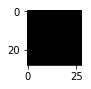

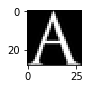

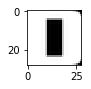

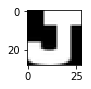

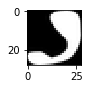

In [48]:
for i in range(5):
    img_mat = (X[np.random.choice(range(len(X)-1))]).reshape(image_size, image_size)
    plt.figure(figsize=(1,1))
    plt.imshow(img_mat, cmap='gray')
    plt.show()

(array([52909., 52911., 52912., 52911., 52912., 52912., 52912., 52912.,
        52912., 52911.]),
 array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ]),
 <a list of 10 Patch objects>)

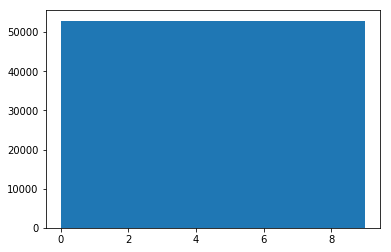

In [49]:
plt.hist(Y)

In [50]:
# https://github.com/AmmarRashed/notMNIST/blob/master/sklearn_lr.ipynb

In [51]:
def data_split(X_full, Y_full, train_size, test_size, valid_size, random_state=42):
    size = train_size + test_size + valid_size
    print('Total size of dataset = %d, train = %d, test = %d, valid = %d' % (size, train_size, test_size, valid_size))
    
    X, y = X_full[:size], Y_full[:size]
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=float(test_size + valid_size) / float(size), random_state=random_state)
    X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=float(test_size) / float(test_size + valid_size), random_state=random_state)
    return X_train, y_train, X_val, y_val, X_test, y_test

In [156]:
X_train, y_train, X_val, y_val, X_test, y_test = data_split(X, Y, 200000, 19000, 10000)

Total size of dataset = 229000, train = 200000, test = 19000, valid = 10000


In [53]:
X_train.shape

(200000, 28, 28)

In [54]:
X_test.shape

(19000, 28, 28)

In [55]:
X_val.shape

(10000, 28, 28)

(array([20004., 20106., 20042., 19939., 19941., 20061., 19955., 19954.,
        19960., 20038.]),
 array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ]),
 <a list of 10 Patch objects>)

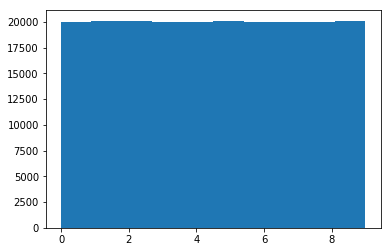

In [56]:
plt.hist(y_train)

(array([1928., 1890., 1892., 1913., 1875., 1812., 1935., 1910., 1944.,
        1901.]),
 array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ]),
 <a list of 10 Patch objects>)

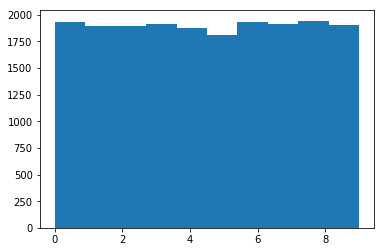

In [57]:
plt.hist(y_test)

(array([1005., 1020., 1010., 1052.,  968., 1000.,  970.,  965., 1007.,
        1003.]),
 array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ]),
 <a list of 10 Patch objects>)

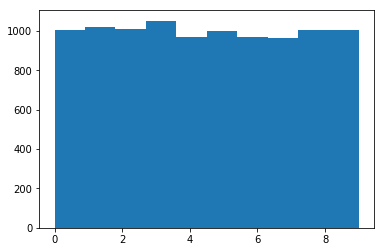

In [58]:
plt.hist(y_val)

In [59]:
def run_cv_logistic(X_full, Y_full, train_size, test_size, valid_size, random_state=42, **params):
    size = train_size + test_size + valid_size
    print('Total size of dataset = %d, train = %d, test = %d, valid = %d' % (size, train_size, test_size, valid_size))
    
    X, y = X_full[:size], Y_full[:size]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=float(test_size) / float(size), random_state=random_state)
    
    nsamples, nx, ny = X_train.shape
    X_train = X_train.reshape((nsamples, nx * ny))
    
    nsamples, nx, ny = X_test.shape
    X_test = X_test.reshape((nsamples, nx * ny))
    
    plt.title('Train and Test distribution')
    plt.subplot(2, 1, 1)
    plt.xlabel('Output')
    plt.ylabel('N')
    plt.hist(y_train, label='Train')
    plt.legend()
    plt.subplot(2, 1, 2)
    plt.xlabel('Output')
    plt.ylabel('N')
    plt.hist(y_test, label='Test')
    plt.legend()
    plt.show()
    
    kf = KFold(n_splits=int(train_size + valid_size) / int(valid_size))
    clf = LogisticRegressionCV(cv=kf, random_state=random_state, multi_class='multinomial', **params).fit(X_train, y_train)
    
    return clf.scores_, clf.score(X_test, y_test)

Total size of dataset = 2290, train = 2000, test = 190, valid = 100


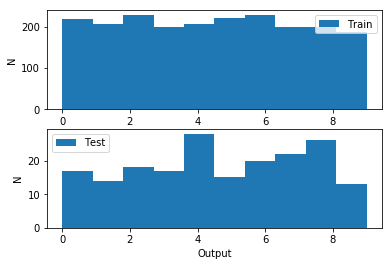

In [60]:
val_scores, test_score = run_cv_logistic(X, Y, 2000, 190, 100, max_iter=10)

In [61]:
print('Validation score = %.3f, test score = %.3f' % (np.max(val_scores.values()), test_score))

Validation score = 0.890, test score = 0.768


Total size of dataset = 21100, train = 2000, test = 19000, valid = 100


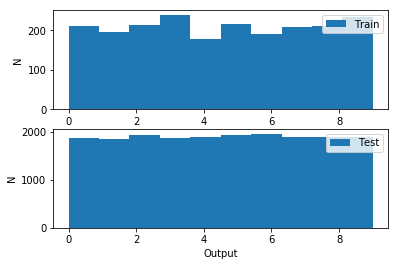

In [62]:
val_scores, test_score = run_cv_logistic(X, Y, 2000, 19000, 100, max_iter=10)

In [63]:
print('Validation score = %.3f, test score = %.3f' % (np.max(val_scores.values()), test_score))

Validation score = 0.870, test score = 0.806


Total size of dataset = 40000, train = 20000, test = 19000, valid = 1000


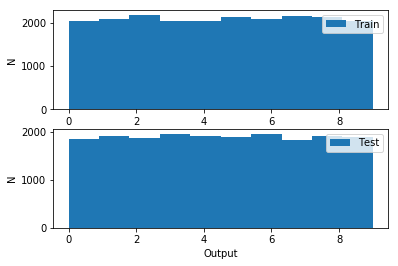

In [64]:
val_scores, test_score = run_cv_logistic(X, Y, 20000, 19000, 1000, max_iter=10)

In [65]:
print('Validation score = %.3f, test score = %.3f' % (np.max(val_scores.values()), test_score))

Validation score = 0.859, test score = 0.825


In [66]:
train_sizes, val_scores, test_scores = list(), list(), list()

Train size = 50
Total size of dataset = 19052, train = 50, test = 19000, valid = 2


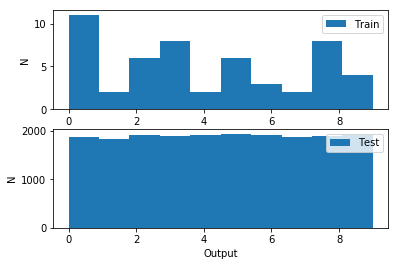

Scores: Test = 0.57, CV = 1.00
------------------
Train size = 100
Total size of dataset = 19105, train = 100, test = 19000, valid = 5


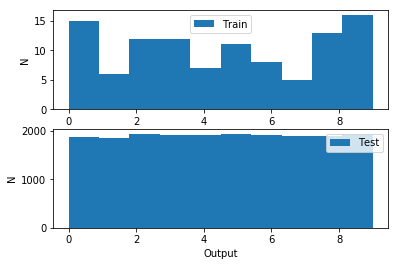

Scores: Test = 0.66, CV = 1.00
------------------
Train size = 500
Total size of dataset = 19525, train = 500, test = 19000, valid = 25


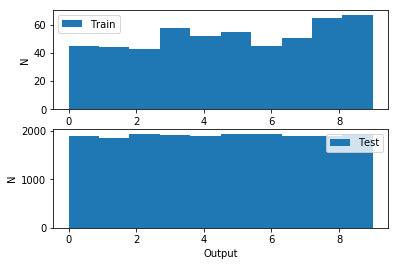

Scores: Test = 0.75, CV = 0.88
------------------
Train size = 1000
Total size of dataset = 20050, train = 1000, test = 19000, valid = 50


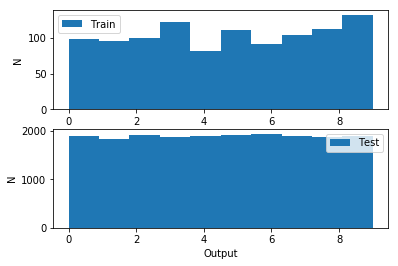

Scores: Test = 0.77, CV = 0.86
------------------
Train size = 5000
Total size of dataset = 24250, train = 5000, test = 19000, valid = 250


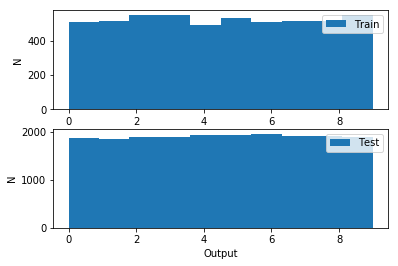

Scores: Test = 0.79, CV = 0.83
------------------
Train size = 10000
Total size of dataset = 29500, train = 10000, test = 19000, valid = 500


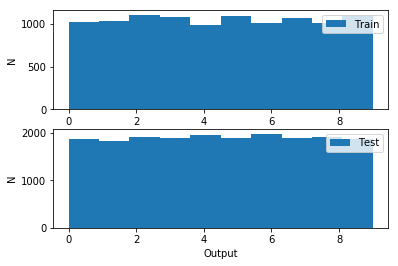

Scores: Test = 0.80, CV = 0.84
------------------
Train size = 50000
Total size of dataset = 71500, train = 50000, test = 19000, valid = 2500


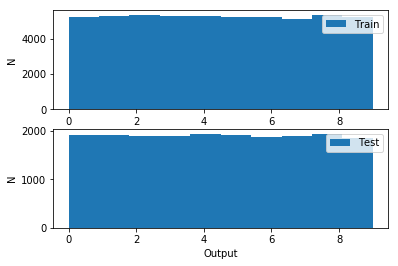

Scores: Test = 0.82, CV = 0.83
------------------
Train size = 100000
Total size of dataset = 124000, train = 100000, test = 19000, valid = 5000


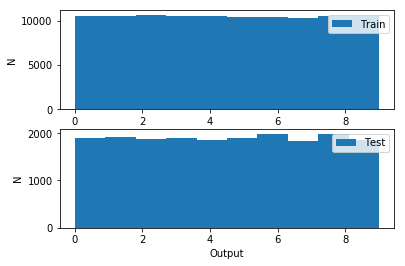

Scores: Test = 0.83, CV = 0.84
------------------


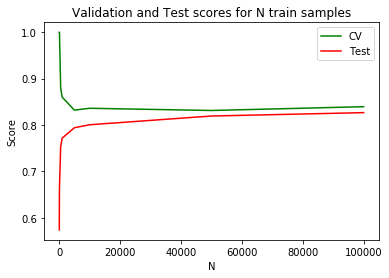

In [67]:
for train_size in [50, 100, 500, 1000, 5000, 10000, 50000, 100000]:
    print('Train size = %d' % train_size)
    val_score, test_score = run_cv_logistic(X, Y, train_size, 19000, int(train_size / 20.0), max_iter=20, solver='sag', n_jobs=-1)
    train_sizes.append(train_size)
    val_scores.append(np.max(val_score.values()))
    test_scores.append(test_score)
    print('Scores: Test = %.2f, CV = %.2f' % (test_score, np.max(val_score.values())))
    print('------------------')
    
plt.title('Validation and Test scores for N train samples')
plt.xlabel('N')
plt.ylabel('Score')
plt.plot(train_sizes, val_scores, color='green', label='CV')
plt.plot(train_sizes, test_scores, color='red', label='Test')
plt.legend()
plt.show()

In [68]:
test_scores

[0.5735789473684211,
 0.662,
 0.7531052631578947,
 0.771578947368421,
 0.794,
 0.8004210526315789,
 0.8192631578947368,
 0.8265789473684211]

In [69]:
val_scores

[1.0, 1.0, 0.88, 0.86, 0.832, 0.836, 0.8312, 0.8394]

In [70]:
import tensorflow as tf
from tensorflow import keras

In [157]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(image_size, image_size)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

In [158]:
model.compile(optimizer=tf.train.GradientDescentOptimizer(learning_rate=0.01), 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [159]:
X_train = X_train / 255.0

In [160]:
X_test = X_test / 255.0

In [161]:
model.fit(X_train, y_train, epochs=15)

Epoch 1/15
200000/200000 [==============================] - 20s 98us/step - loss: 0.6479 - acc: 0.8238
Epoch 2/15
200000/200000 [==============================] - 20s 99us/step - loss: 0.5235 - acc: 0.8507
Epoch 3/15
200000/200000 [==============================] - 21s 106us/step - loss: 0.4795 - acc: 0.8609
Epoch 4/15
200000/200000 [==============================] - 19s 94us/step - loss: 0.4512 - acc: 0.8689
Epoch 5/15
200000/200000 [==============================] - 20s 101us/step - loss: 0.4301 - acc: 0.8744
Epoch 6/15
200000/200000 [==============================] - 19s 94us/step - loss: 0.4135 - acc: 0.8793
Epoch 7/15
200000/200000 [==============================] - 19s 97us/step - loss: 0.3997 - acc: 0.8833
Epoch 8/15
200000/200000 [==============================] - 19s 96us/step - loss: 0.3880 - acc: 0.8867
Epoch 9/15
200000/200000 [==============================] - 25s 125us/step - loss: 0.3778 - acc: 0.8894
Epoch 10/15
200000/200000 [==============================] - 18s 91us/

In [162]:
test_loss, test_acc = model.evaluate(X_test, y_test)

print('Test accuracy:', test_acc)

19000/19000 [==============================] - 2s 96us/step
('Test accuracy:', 0.8925263157894737)


In [163]:
class StandardNN:
    def __init__(self, hidden_layers_sizes=[], hidden_layers_activations=[], optimizer=tf.train.GradientDescentOptimizer(learning_rate=0.01)):
        self.hidden_layers_sizes = hidden_layers_sizes
        self.hidden_layers_activations = hidden_layers_activations
        self.optimizer = optimizer
        
        if len(self.hidden_layers_sizes) != len(self.hidden_layers_activations):
            raise Exception('Layer sizes must be equal!')
        
    def build(self):
        model = keras.Sequential()
        model.add(keras.layers.Flatten(input_shape=(image_size, image_size)))
        
        for i in range(len(self.hidden_layers_sizes)):
            model.add(keras.layers.Dense(self.hidden_layers_sizes[i], activation=self.hidden_layers_activations[i]))
        
        model.add(keras.layers.Dense(10, activation=tf.nn.softmax))
        model.compile(optimizer=self.optimizer, 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
        
        self.model = model
        
        return self
        
    def fit(self, x, y, epochs=15):
        self.model.fit(x, y, epochs=epochs)
        
        return self
    
    def score(self, x, y):
        test_loss, test_acc = self.model.evaluate(X_test, y_test)
        
        return test_acc

In [164]:
nn0 = StandardNN(hidden_layers_sizes=[128], hidden_layers_activations=[tf.nn.relu])

nn0.build().fit(X_train, y_train).score(X_test, y_test)

Epoch 1/15
200000/200000 [==============================] - 26s 130us/step - loss: 0.6472 - acc: 0.8225
Epoch 2/15
200000/200000 [==============================] - 28s 138us/step - loss: 0.5198 - acc: 0.8514
Epoch 3/15
200000/200000 [==============================] - 25s 123us/step - loss: 0.4762 - acc: 0.8624
Epoch 4/15
200000/200000 [==============================] - 27s 136us/step - loss: 0.4482 - acc: 0.8698
Epoch 5/15
200000/200000 [==============================] - 23s 116us/step - loss: 0.4269 - acc: 0.8757
Epoch 6/15
200000/200000 [==============================] - 23s 113us/step - loss: 0.4103 - acc: 0.8799
Epoch 7/15
200000/200000 [==============================] - 23s 113us/step - loss: 0.3970 - acc: 0.8839
Epoch 8/15
200000/200000 [==============================] - 25s 126us/step - loss: 0.3854 - acc: 0.8874
Epoch 9/15
200000/200000 [==============================] - 31s 155us/step - loss: 0.3757 - acc: 0.8904
Epoch 10/15
200000/200000 [==============================] - 32s

0.8902105263408862

In [165]:
nn2 = StandardNN(hidden_layers_sizes=[64, 128, 256, 128], hidden_layers_activations=[tf.nn.relu, tf.nn.sigmoid, tf.nn.tanh, tf.nn.relu])

nn2.build().fit(X_train, y_train).score(X_test, y_test)

Epoch 1/15
200000/200000 [==============================] - 25s 124us/step - loss: 0.8078 - acc: 0.7771
Epoch 2/15
200000/200000 [==============================] - 24s 118us/step - loss: 0.5333 - acc: 0.8452
Epoch 3/15
200000/200000 [==============================] - 26s 129us/step - loss: 0.4876 - acc: 0.8555
Epoch 4/15
200000/200000 [==============================] - 22s 112us/step - loss: 0.4581 - acc: 0.8629
Epoch 5/15
200000/200000 [==============================] - 22s 109us/step - loss: 0.4354 - acc: 0.8690
Epoch 6/15
200000/200000 [==============================] - 23s 115us/step - loss: 0.4171 - acc: 0.8739
Epoch 7/15
200000/200000 [==============================] - 26s 129us/step - loss: 0.4023 - acc: 0.8780
Epoch 8/15
200000/200000 [==============================] - 23s 115us/step - loss: 0.3906 - acc: 0.88131s - 
Epoch 9/15
200000/200000 [==============================] - 23s 117us/step - loss: 0.3796 - acc: 0.8848
Epoch 10/15
200000/200000 [==============================] 

0.8906315789222717

In [166]:
nn3 = StandardNN(hidden_layers_sizes=[64, 128, 64, 32], hidden_layers_activations=[tf.nn.relu, tf.nn.relu, tf.nn.relu, tf.nn.relu])

nn3.build().fit(X_train, y_train).score(X_test, y_test)

Epoch 1/15
200000/200000 [==============================] - 20s 100us/step - loss: 0.6812 - acc: 0.8004
Epoch 2/15
200000/200000 [==============================] - 18s 89us/step - loss: 0.4923 - acc: 0.8522
Epoch 3/15
200000/200000 [==============================] - 21s 106us/step - loss: 0.4491 - acc: 0.8645
Epoch 4/15
200000/200000 [==============================] - 27s 134us/step - loss: 0.4200 - acc: 0.8721
Epoch 5/15
200000/200000 [==============================] - 24s 120us/step - loss: 0.3988 - acc: 0.8783
Epoch 6/15
200000/200000 [==============================] - 21s 105us/step - loss: 0.3809 - acc: 0.8843
Epoch 7/15
200000/200000 [==============================] - 23s 114us/step - loss: 0.3672 - acc: 0.8881
Epoch 8/15
200000/200000 [==============================] - 18s 89us/step - loss: 0.3556 - acc: 0.8919
Epoch 9/15
200000/200000 [==============================] - 18s 91us/step - loss: 0.3455 - acc: 0.8952
Epoch 10/15
200000/200000 [==============================] - 22s 11

0.8913684210275349

In [167]:
nn3 = StandardNN(hidden_layers_sizes=[256, 256], hidden_layers_activations=[tf.nn.tanh, tf.nn.relu])

nn3.build().fit(X_train, y_train).score(X_test, y_test)

Epoch 1/15
200000/200000 [==============================] - 33s 165us/step - loss: 0.6075 - acc: 0.8291
Epoch 2/15
200000/200000 [==============================] - 51s 254us/step - loss: 0.4798 - acc: 0.8586
Epoch 3/15
200000/200000 [==============================] - 50s 248us/step - loss: 0.4382 - acc: 0.8696
Epoch 4/15
200000/200000 [==============================] - 35s 177us/step - loss: 0.4094 - acc: 0.8777
Epoch 5/15
200000/200000 [==============================] - 29s 144us/step - loss: 0.3868 - acc: 0.8847
Epoch 6/15
200000/200000 [==============================] - 27s 136us/step - loss: 0.3682 - acc: 0.8903
Epoch 7/15
200000/200000 [==============================] - 27s 137us/step - loss: 0.3525 - acc: 0.8943
Epoch 8/15
200000/200000 [==============================] - 28s 140us/step - loss: 0.3387 - acc: 0.8987
Epoch 9/15
200000/200000 [==============================] - 36s 182us/step - loss: 0.3263 - acc: 0.9025
Epoch 10/15
200000/200000 [==============================] - 30s

0.901684210501219

In [168]:
nn4 = StandardNN(hidden_layers_sizes=[280, 280, 140], hidden_layers_activations=[tf.nn.tanh, tf.nn.tanh, tf.nn.relu])

nn4.build().fit(X_train, y_train).score(X_test, y_test)

Epoch 1/15
200000/200000 [==============================] - 68s 342us/step - loss: 0.5867 - acc: 0.8334
Epoch 2/15
200000/200000 [==============================] - 63s 317us/step - loss: 0.4621 - acc: 0.8610
Epoch 3/15
200000/200000 [==============================] - 51s 255us/step - loss: 0.4216 - acc: 0.8723
Epoch 4/15
200000/200000 [==============================] - 37s 186us/step - loss: 0.3938 - acc: 0.8806
Epoch 5/15
200000/200000 [==============================] - 47s 234us/step - loss: 0.3718 - acc: 0.8877
Epoch 6/15
200000/200000 [==============================] - 33s 166us/step - loss: 0.3540 - acc: 0.8927
Epoch 7/15
200000/200000 [==============================] - 40s 199us/step - loss: 0.3381 - acc: 0.8980
Epoch 8/15
200000/200000 [==============================] - 40s 202us/step - loss: 0.3251 - acc: 0.9014
Epoch 9/15
200000/200000 [==============================] - 25s 123us/step - loss: 0.3125 - acc: 0.9056
Epoch 10/15
200000/200000 [==============================] - 26s

0.9026315789222717

In [169]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.005)
layer_sizes = [280, 280, 140]
layer_activations = [tf.nn.tanh, tf.nn.tanh, tf.nn.relu]

nn5 = StandardNN(hidden_layers_sizes=layer_sizes, hidden_layers_activations=layer_activations, optimizer=optimizer)

nn5.build().fit(X_train, y_train).score(X_test, y_test)

Epoch 1/15
200000/200000 [==============================] - 26s 130us/step - loss: 0.6486 - acc: 0.8206
Epoch 2/15
200000/200000 [==============================] - 25s 126us/step - loss: 0.5061 - acc: 0.85091s - lo
Epoch 3/15
200000/200000 [==============================] - 25s 125us/step - loss: 0.4668 - acc: 0.8604
Epoch 4/15
200000/200000 [==============================] - 25s 126us/step - loss: 0.4411 - acc: 0.86751s 
Epoch 5/15
200000/200000 [==============================] - 26s 132us/step - loss: 0.4209 - acc: 0.8730
Epoch 6/15
200000/200000 [==============================] - 35s 173us/step - loss: 0.4047 - acc: 0.8779
Epoch 7/15
200000/200000 [==============================] - 43s 214us/step - loss: 0.3904 - acc: 0.8823
Epoch 8/15
200000/200000 [==============================] - 28s 139us/step - loss: 0.3777 - acc: 0.8864
Epoch 9/15
200000/200000 [==============================] - 32s 160us/step - loss: 0.3664 - acc: 0.8894
Epoch 10/15
200000/200000 [===========================

0.892684210501219

In [170]:
optimizer = tf.keras.optimizers.SGD(lr=0.01)
layer_sizes = [280, 280, 140]
layer_activations = [tf.nn.tanh, tf.nn.tanh, tf.nn.relu]

nn5 = StandardNN(hidden_layers_sizes=layer_sizes, hidden_layers_activations=layer_activations, optimizer=optimizer)

nn5.build().fit(X_train, y_train).score(X_test, y_test)

Epoch 1/15
200000/200000 [==============================] - 26s 132us/step - loss: 0.5890 - acc: 0.8330
Epoch 2/15
200000/200000 [==============================] - 27s 133us/step - loss: 0.4630 - acc: 0.8613
Epoch 3/15
200000/200000 [==============================] - 27s 135us/step - loss: 0.4220 - acc: 0.8730
Epoch 4/15
200000/200000 [==============================] - 35s 175us/step - loss: 0.3935 - acc: 0.8812
Epoch 5/15
200000/200000 [==============================] - 40s 198us/step - loss: 0.3719 - acc: 0.8876
Epoch 6/15
200000/200000 [==============================] - 36s 181us/step - loss: 0.3539 - acc: 0.8925
Epoch 7/15
200000/200000 [==============================] - 37s 183us/step - loss: 0.3386 - acc: 0.8972
Epoch 8/15
200000/200000 [==============================] - 43s 216us/step - loss: 0.3248 - acc: 0.9013
Epoch 9/15
200000/200000 [==============================] - 38s 191us/step - loss: 0.3126 - acc: 0.9047
Epoch 10/15
200000/200000 [==============================] - 30s

0.9014210526064823

In [171]:
optimizer = tf.train.AdamOptimizer()
layer_sizes = [280, 280, 140]
layer_activations = [tf.nn.tanh, tf.nn.tanh, tf.nn.relu]

nn6 = StandardNN(hidden_layers_sizes=layer_sizes, hidden_layers_activations=layer_activations, optimizer=optimizer)

nn6.build().fit(X_train, y_train).score(X_test, y_test)

Epoch 1/15
200000/200000 [==============================] - 41s 205us/step - loss: 0.4914 - acc: 0.8511
Epoch 2/15
200000/200000 [==============================] - 40s 198us/step - loss: 0.4100 - acc: 0.8735
Epoch 3/15
200000/200000 [==============================] - 38s 190us/step - loss: 0.3834 - acc: 0.8809
Epoch 4/15
200000/200000 [==============================] - 30s 150us/step - loss: 0.3658 - acc: 0.8862
Epoch 5/15
200000/200000 [==============================] - 27s 137us/step - loss: 0.3531 - acc: 0.8894
Epoch 6/15
200000/200000 [==============================] - 31s 153us/step - loss: 0.3446 - acc: 0.8918
Epoch 7/15
200000/200000 [==============================] - 46s 229us/step - loss: 0.3343 - acc: 0.8948
Epoch 8/15
200000/200000 [==============================] - 41s 204us/step - loss: 0.3291 - acc: 0.8962
Epoch 9/15
200000/200000 [==============================] - 33s 165us/step - loss: 0.3262 - acc: 0.8971
Epoch 10/15
200000/200000 [==============================] - 42s

0.8889473684210526

In [172]:
class DropoutNN:
    def __init__(self, hidden_layers_sizes=[], hidden_layers_activations=[], optimizer=tf.train.GradientDescentOptimizer(learning_rate=0.01)):
        self.hidden_layers_sizes = hidden_layers_sizes
        self.hidden_layers_activations = hidden_layers_activations
        self.optimizer = optimizer
        
        if len(self.hidden_layers_sizes) != len(self.hidden_layers_activations):
            raise Exception('Layer sizes must be equal!')
        
    def build(self):
        model = keras.Sequential()
        model.add(keras.layers.Flatten(input_shape=(image_size, image_size)))
        
        for i in range(len(self.hidden_layers_sizes)):
            model.add(keras.layers.Dense(self.hidden_layers_sizes[i], activation=self.hidden_layers_activations[i]))
            model.add(keras.layers.Dropout(rate=0.3))
        
        model.add(keras.layers.Dense(10, activation=tf.nn.softmax))
        model.compile(optimizer=self.optimizer, 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
        
        self.model = model
        
        return self
        
    def fit(self, x, y, epochs=15):
        self.model.fit(x, y, epochs=epochs)
        
        return self
    
    def score(self, x, y):
        test_loss, test_acc = self.model.evaluate(X_test, y_test)
        
        return test_acc

In [173]:
optimizer = tf.train.AdamOptimizer()
layer_sizes = [image_size * image_size, image_size * image_size / 2, image_size * 5]
layer_activations = [tf.nn.tanh, tf.nn.tanh, tf.nn.relu]

nn7 = DropoutNN(hidden_layers_sizes=layer_sizes, hidden_layers_activations=layer_activations, optimizer=optimizer)

nn7.build().fit(X_train, y_train).score(X_test, y_test)

Epoch 1/15
200000/200000 [==============================] - 83s 417us/step - loss: 0.6114 - acc: 0.8192
Epoch 2/15
200000/200000 [==============================] - 92s 460us/step - loss: 0.5403 - acc: 0.8391
Epoch 3/15
200000/200000 [==============================] - 75s 373us/step - loss: 0.5226 - acc: 0.8438
Epoch 4/15
200000/200000 [==============================] - 68s 340us/step - loss: 0.5126 - acc: 0.84660s - loss: 0.5127 - 
Epoch 5/15
200000/200000 [==============================] - 91s 455us/step - loss: 0.5062 - acc: 0.8478
Epoch 6/15
200000/200000 [==============================] - 93s 467us/step - loss: 0.5003 - acc: 0.8498
Epoch 7/15
200000/200000 [==============================] - 90s 448us/step - loss: 0.4982 - acc: 0.8515
Epoch 8/15
200000/200000 [==============================] - 96s 482us/step - loss: 0.4938 - acc: 0.8512
Epoch 9/15
200000/200000 [==============================] - 74s 370us/step - loss: 0.4945 - acc: 0.8523
Epoch 10/15
200000/200000 [=================

0.8718421052631579

In [174]:
X_train, y_train, X_val, y_val, X_test, y_test = data_split(X, Y, 20000, 50000, 10000)

Total size of dataset = 80000, train = 20000, test = 50000, valid = 10000


(array([1994., 2028., 2068., 2034., 1926., 2015., 1962., 1979., 2064.,
        1930.]),
 array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ]),
 <a list of 10 Patch objects>)

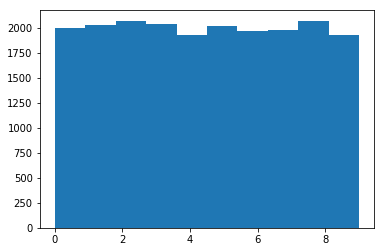

In [175]:
plt.hist(y_train)

In [176]:
X_test = X_test / 255.0
X_train = X_train / 255.0

In [177]:
nn7.build().fit(X_train, y_train).score(X_test, y_test)

Epoch 1/15
20000/20000 [==============================] - 7s 366us/step - loss: 1.2698 - acc: 0.5821
Epoch 2/15
20000/20000 [==============================] - 6s 303us/step - loss: 0.8876 - acc: 0.7388
Epoch 3/15
20000/20000 [==============================] - 6s 296us/step - loss: 0.7945 - acc: 0.7684
Epoch 4/15
20000/20000 [==============================] - 6s 295us/step - loss: 0.7307 - acc: 0.7885
Epoch 5/15
20000/20000 [==============================] - 7s 364us/step - loss: 0.6884 - acc: 0.7974
Epoch 6/15
20000/20000 [==============================] - 13s 648us/step - loss: 0.6685 - acc: 0.7985
Epoch 7/15
20000/20000 [==============================] - 7s 336us/step - loss: 0.6394 - acc: 0.8099
Epoch 8/15
20000/20000 [==============================] - 7s 366us/step - loss: 0.6216 - acc: 0.8147
Epoch 9/15
20000/20000 [==============================] - 8s 385us/step - loss: 0.6119 - acc: 0.8193
Epoch 10/15
20000/20000 [==============================] - 6s 310us/step - loss: 0.5969 - 

0.84666

In [178]:
nn6.build().fit(X_train, y_train).score(X_test, y_test)

Epoch 1/15
20000/20000 [==============================] - 5s 246us/step - loss: 0.7170 - acc: 0.7856 2s
Epoch 2/15
20000/20000 [==============================] - 3s 166us/step - loss: 0.5218 - acc: 0.8423
Epoch 3/15
20000/20000 [==============================] - 4s 214us/step - loss: 0.4695 - acc: 0.8569
Epoch 4/15
20000/20000 [==============================] - 3s 173us/step - loss: 0.4327 - acc: 0.8655
Epoch 5/15
20000/20000 [==============================] - 4s 176us/step - loss: 0.4115 - acc: 0.8705
Epoch 6/15
20000/20000 [==============================] - 4s 187us/step - loss: 0.3848 - acc: 0.8778
Epoch 7/15
20000/20000 [==============================] - 3s 162us/step - loss: 0.3642 - acc: 0.8837
Epoch 8/15
20000/20000 [==============================] - 3s 159us/step - loss: 0.3448 - acc: 0.8873
Epoch 9/15
20000/20000 [==============================] - 3s 162us/step - loss: 0.3154 - acc: 0.8985
Epoch 10/15
20000/20000 [==============================] - 4s 211us/step - loss: 0.3068 

0.85082

In [127]:
# https://www.ritchieng.com/machine-learning/deep-learning/tensorflow/regularization/

In [128]:
# https://www.ritchieng.com/machine-learning/deep-learning/tensorflow/deep-neural-nets/

In [129]:
# https://www.ritchieng.com/machine-learning/deep-learning/tensorflow/notmnist/

In [203]:
X_train, y_train, X_val, y_val, X_test, y_test = data_split(X, Y, 200000, 19000, 10000)

Total size of dataset = 229000, train = 200000, test = 19000, valid = 10000


In [204]:
X_test = X_test / 255.0
X_train = X_train / 255.0

In [206]:
optimizer = tf.train.AdamOptimizer()
layer_sizes = [image_size * image_size, image_size * image_size / 2, image_size * 5]
layer_activations = [tf.nn.relu, tf.nn.relu, tf.nn.relu]

nn8 = DropoutNN(hidden_layers_sizes=layer_sizes, hidden_layers_activations=layer_activations, optimizer=optimizer)

nn8.build().fit(X_train, y_train, epochs=30).score(X_test, y_test)

Epoch 1/30
200000/200000 [==============================] - 79s 397us/step - loss: 0.5719 - acc: 0.8313
Epoch 2/30
200000/200000 [==============================] - 65s 323us/step - loss: 0.4716 - acc: 0.8601
Epoch 3/30
200000/200000 [==============================] - 70s 351us/step - loss: 0.4393 - acc: 0.8697
Epoch 4/30
200000/200000 [==============================] - 57s 283us/step - loss: 0.4211 - acc: 0.87530s - loss: 0.4213 -
Epoch 5/30
200000/200000 [==============================] - 53s 266us/step - loss: 0.4070 - acc: 0.87960s - loss: 0.4071 - 
Epoch 6/30
200000/200000 [==============================] - 54s 269us/step - loss: 0.3962 - acc: 0.8822
Epoch 7/30
200000/200000 [==============================] - 53s 265us/step - loss: 0.3882 - acc: 0.8844
Epoch 8/30
200000/200000 [==============================] - 53s 265us/step - loss: 0.3802 - acc: 0.88650s - loss: 0.3802 - acc: 0.
Epoch 9/30
200000/200000 [==============================] - 53s 266us/step - loss: 0.3740 - acc: 0.888

0.9029473683959559

In [211]:
import numpy as np
import tensorflow as tf
import math


class TensorflowNN:
    def __init__(self, X_train, y_train, X_test, y_test, hidden_layer_sizes=[10],
                 hidden_layers_activations=[tf.nn.relu], lr=0.01, num_labels=10, train_subset=10000, num_steps=500,
                 start_learning_rate=0.5, beta=0.001, image_size=28, dropout_prob=0.3, use_dropout=False,
                 use_regularizers=False, use_dynamic_lr=False):
        if len(hidden_layer_sizes) != len(hidden_layers_activations):
            raise AssertionError('Layers must be equal')

        def reformat(dataset, labels):
            dataset = dataset.reshape((-1, image_size * image_size)).astype(np.float32)
            labels = (np.arange(num_labels) == labels[:, None]).astype(np.float32)
            return dataset, labels

        def accuracy(predicts, labels):
            return 100.0 * (np.sum(np.argmax(predicts, 1) == np.argmax(labels, 1)) / predicts.shape[0])

        print('---------------------------------------')
        print('Initial arguments:')
        print('---------------------------------------')
        print('X_train shape =', X_train.shape)
        print('X_test shape =', X_test.shape)
        print('y_train shape =', y_train.shape)
        print('y_test shape =', y_test.shape)
        print('Hidden layers = %d layers' % len(hidden_layer_sizes))
        print('Learning rate = %.4f' % lr)
        print('Image size = %d' % image_size)
        print('Labels = %d' % num_labels)
        print('train_subset = %d' % train_subset)
        print('Epochs to train = %d' % num_steps)
        print('Initial learning rate for dynamic learning rate = %.3f' % start_learning_rate)
        print('Beta for regularizations = %.3f' % beta)
        print('Dropout prob = %.3f' % dropout_prob)
        print('---------------------------------------')
        print('Initial flags:')
        print('---------------------------------------')
        print('use_dropout=%s, use_regularizers=%s, use_dynamic_lr=%s' % (
        use_dropout, use_regularizers, use_dynamic_lr))
        print('---------------------------------------')

        train_dataset, train_labels = reformat(X_train, y_train)
        test_dataset, test_labels = reformat(X_test, y_test)
        graph = tf.Graph()
        with graph.as_default():
            tf_train_dataset = tf.constant(train_dataset[:train_subset, :])
            tf_train_labels = tf.constant(train_labels[:train_subset])
            tf_test_dataset = tf.constant(test_dataset)
            weights = [None for i in range(len(hidden_layer_sizes))]
            biases = [None for i in range(len(hidden_layer_sizes))]
            logits = [None for i in range(len(hidden_layer_sizes))]
            test_logits = [None for i in range(len(hidden_layer_sizes))]
            hidden_layer = [None for i in range(len(hidden_layer_sizes))]
            hidden_layer_output = [None for i in range(len(hidden_layer_sizes))]
            output = None
            test_output = None

            keep_prob = tf.constant(dropout_prob, dtype=tf.float32)

            for i in range(len(hidden_layer_sizes)):
                prev = image_size * image_size
                prev_layer = tf_train_dataset
                prev_test_layer = tf_test_dataset

                if i > 0:
                    prev = hidden_layer_sizes[i - 1]
                    prev_layer = hidden_layer_output[i - 1]
                    prev_test_layer = test_logits[i - 1]

                weights[i] = tf.Variable(tf.truncated_normal([prev, hidden_layer_sizes[i]]))
                biases[i] = tf.Variable(tf.zeros([hidden_layer_sizes[i]]))
                logits[i] = tf.matmul(prev_layer, weights[i]) + biases[i]
                test_logits[i] = tf.matmul(prev_test_layer, weights[i]) + biases[i]
                if i < len(hidden_layer_sizes) - 1:
                    if use_dropout:
                        hidden_layer[i] = hidden_layers_activations[i](logits[i])
                        hidden_layer_output[i] = tf.nn.dropout(hidden_layer[i], keep_prob)
                    else:
                        hidden_layer_output[i] = hidden_layers_activations[i](logits[i])
                else:
                    output = logits[i]
                    test_output = test_logits[i]

            loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=output, labels=tf_train_labels))
            if use_regularizers:
                regularizers = tf.nn.l2_loss(weights[0])
                for i in range(1, len(weights)):
                    regularizers = regularizers + tf.nn.l2_loss(weights[i])
                loss = tf.reduce_mean(loss + beta * regularizers)

            optimizer = tf.train.GradientDescentOptimizer(lr).minimize(loss)

            if use_dynamic_lr:
                global_step = tf.Variable(0)
                learning_rate = tf.train.exponential_decay(start_learning_rate, global_step, 100000, 0.96,
                                                           staircase=True)
                optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(loss, global_step=global_step)

            train_prediction = tf.nn.softmax(output)
            test_prediction = tf.nn.softmax(test_output)

        with tf.Session(graph=graph) as session:
            tf.initialize_all_variables().run()
            writer = tf.summary.FileWriter('./graphs', session.graph)
            print('------------------------')
            print('Start...')
            loss_hist = list()
            acc_hist = list()
            step_hist = list()
            for step in range(num_steps):
                _, l, predictions = session.run([optimizer, loss, train_prediction])
                if step % 100 == 0:
                    acc = accuracy(predictions, train_labels[:train_subset, :])
                    loss_hist.append(l)
                    acc_hist.append(acc)
                    step_hist.append(step)
                    print('%d/%d step - loss: %.5f - acc: %.5f' % (
                        step, num_steps, l, acc))
            print('------------------------')
            print('Test score: %.2f' % (accuracy(test_prediction.eval(), test_labels)))
            plt.title('Train loss/scores for the epoch')
            plt.xlabel('Epoch')
            plt.ylabel('Score')
            plt.plot(step_hist, loss_hist, color='green', label='Loss')
            plt.plot(step_hist, acc_hist, color='red', label='Accuracy')
            plt.legend()
            plt.show()


---------------------------------------
Initial arguments:
---------------------------------------
('X_train shape =', (200000, 28, 28))
('X_test shape =', (19000, 28, 28))
('y_train shape =', (200000,))
('y_test shape =', (19000,))
Hidden layers = 1 layers
Learning rate = 0.0100
Image size = 28
Labels = 10
train_subset = 10000
Epochs to train = 500
Initial learning rate for dynamic learning rate = 0.500
Beta for regularizations = 0.001
Dropout prob = 0.300
---------------------------------------
Initial flags:
---------------------------------------
use_dropout=False, use_regularizers=False, use_dynamic_lr=False
---------------------------------------
------------------------
Start...
0/500 step - loss: 20.95 - acc: 0.00
100/500 step - loss: 9.43 - acc: 0.00
200/500 step - loss: 7.38 - acc: 0.00
300/500 step - loss: 6.34 - acc: 0.00
400/500 step - loss: 5.63 - acc: 0.00
------------------------
Test score: 0.00


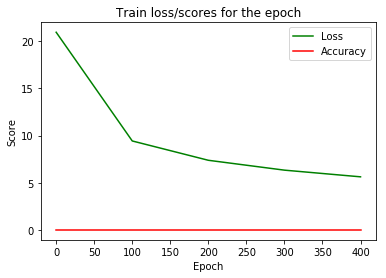

<__main__.TensorflowNN instance at 0x125d11d40>

In [205]:
TensorflowNN(X_train, y_train, X_test, y_test)

In [229]:
class DropoutRegularizationNN:
    def __init__(self, hidden_layers_sizes=[], hidden_layers_activations=[], optimizer=tf.train.GradientDescentOptimizer(learning_rate=0.01)):
        self.hidden_layers_sizes = hidden_layers_sizes
        self.hidden_layers_activations = hidden_layers_activations
        self.optimizer = optimizer
        
        if len(self.hidden_layers_sizes) != len(self.hidden_layers_activations):
            raise Exception('Layer sizes must be equal!')
        
    def build(self):
        model = keras.Sequential()
        model.add(keras.layers.Flatten(input_shape=(image_size, image_size)))
        
        for i in range(len(self.hidden_layers_sizes)):
            model.add(keras.layers.Dense(self.hidden_layers_sizes[i], activation=self.hidden_layers_activations[i], 
                kernel_regularizer=keras.regularizers.l1_l2(l1=0.,l2=0.),
                bias_regularizer=keras.regularizers.l1_l2(l1=0.,l2=0.)))
            model.add(keras.layers.Dropout(rate=0.3))
        
        model.add(keras.layers.Dense(10, activation=tf.nn.softmax))
        model.compile(optimizer=self.optimizer, 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
        
        self.model = model
        
        return self
        
    def fit(self, x, y, epochs=15):
        self.model.fit(x, y, epochs=epochs)
        
        return self
    
    def score(self, x, y):
        test_loss, test_acc = self.model.evaluate(X_test, y_test)
        
        return test_acc

In [231]:
optimizer = tf.train.AdamOptimizer()
layer_sizes = [image_size * image_size, image_size * image_size / 2, image_size * 5]
layer_activations = [tf.nn.relu, tf.nn.relu, tf.nn.relu]

nn9 = DropoutRegularizationNN(hidden_layers_sizes=layer_sizes, hidden_layers_activations=layer_activations, optimizer=optimizer)

nn9.build().fit(X_train, y_train, epochs=30).score(X_test, y_test)

Epoch 1/30
10000/10000 [==============================] - 6s 620us/step - loss: 0.9440 - acc: 0.7072
Epoch 2/30
10000/10000 [==============================] - 3s 328us/step - loss: 0.6512 - acc: 0.8100
Epoch 3/30
10000/10000 [==============================] - 3s 336us/step - loss: 0.5787 - acc: 0.8248
Epoch 4/30
10000/10000 [==============================] - 3s 313us/step - loss: 0.5374 - acc: 0.8405
Epoch 5/30
10000/10000 [==============================] - 4s 401us/step - loss: 0.5037 - acc: 0.8471
Epoch 6/30
10000/10000 [==============================] - 3s 345us/step - loss: 0.4816 - acc: 0.8574
Epoch 7/30
10000/10000 [==============================] - 3s 334us/step - loss: 0.4500 - acc: 0.8638
Epoch 8/30
10000/10000 [==============================] - 3s 335us/step - loss: 0.4281 - acc: 0.8688
Epoch 9/30
10000/10000 [==============================] - 3s 335us/step - loss: 0.4086 - acc: 0.8747
Epoch 10/30
10000/10000 [==============================] - 3s 340us/step - loss: 0.3953 - a

0.859526315764377